# Welcome to the EEweather Tutorial

This tutorial is pretty minimal for now, but it demonstrates loading and using eeweather for the simple task of finding a nearby weather station (using lat/long coordinates) and loading temperature data for that station.

In [1]:
%matplotlib inline

import json
import datetime

import eeweather
import matplotlib.pyplot as plt

In [2]:
%%javascript --out hi
/* 
   OPTIONAL - Run this to get your approximate coordinates for use below.
   Uses your browser's IP and a free external service.
*/
var xhr = new XMLHttpRequest();
xhr.open('GET', '//freegeoip.net/json/');
xhr.onload = function() {
    if (xhr.status === 200) {
        var output = JSON.parse(xhr.responseText);
        element.text('Your (very roughly approximate) coordinates: (' + output.latitude + ', '+ output.longitude + ')');
    }
};
xhr.send();

<IPython.core.display.Javascript object>

In [3]:
# default coordinates are in downtown chicago
# replace with your own coordinates from above if you'd like
lat, long = (41.8781, -87.6298)

In [4]:
result = eeweather.match_lat_long(lat, long)
result

ISDStationMapping('725340')

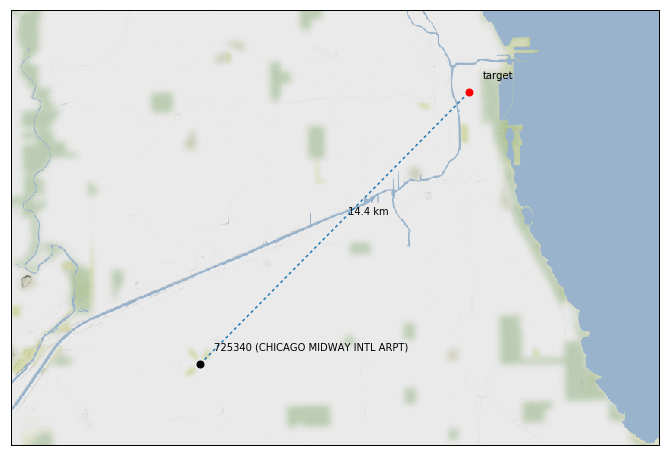

In [5]:
result.plot()

In [6]:
# get station object from result
station = result.isd_station
station

ISDStation('725340')

In [7]:
# view station data
print(json.dumps(station.json(), indent=2))

{
  "elevation": 186.5,
  "latitude": 41.786,
  "longitude": -87.752,
  "name": "CHICAGO MIDWAY INTL ARPT",
  "quality": "high",
  "wban_ids": [
    "14819"
  ],
  "recent_wban_id": "14819",
  "climate_zones": {
    "iecc_climate_zone": "5",
    "iecc_moisture_regime": "A",
    "ba_climate_zone": "Cold",
    "ca_climate_zone": null
  }
}


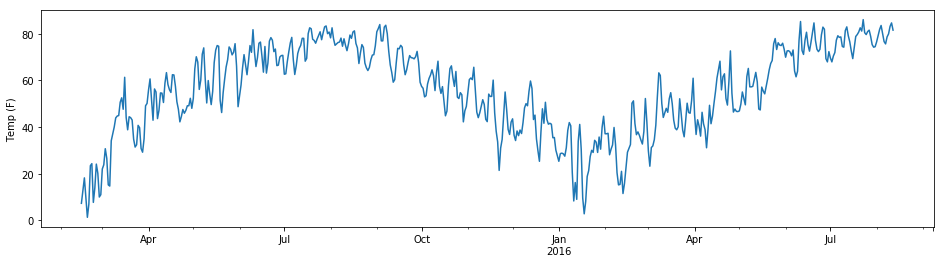

In [8]:
start = datetime.datetime(2015, 2, 15)
end = datetime.datetime(2016, 8, 12)
temp_C = station.load_gsod_daily_temp_data(start, end)
temp_F = temp_C * 1.8 + 32  # convert from Celsius to Fahrenheit
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
plt.show()